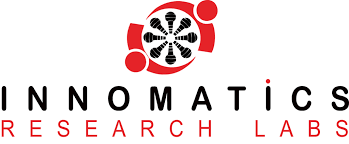

# Task - 12

# Exploratory Data Analysis of PUBG Data

## Data Description

In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.\
A large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats is provided. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 players per group.

## Objective
* Detailed univariate and bivariate analysis with proper observations.
* Identify some research questions and perform hypothesis testing to test your hypothesis.
* A proper conclusion containing best observations.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("data_eda.csv")

In [3]:
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [4]:
df.shape

(1111742, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
Unnamed: 0         1111742 non-null int64
Id                 1111742 non-null object
groupId            1111742 non-null object
matchId            1111742 non-null object
assists            1111742 non-null int64
boosts             1111742 non-null int64
damageDealt        1111742 non-null float64
DBNOs              1111742 non-null int64
headshotKills      1111742 non-null int64
heals              1111742 non-null int64
killPlace          1111742 non-null int64
killPoints         1111742 non-null int64
kills              1111742 non-null int64
killStreaks        1111742 non-null int64
longestKill        1111742 non-null float64
matchDuration      1111742 non-null int64
matchType          1111742 non-null object
maxPlace           1111742 non-null int64
numGroups          1111742 non-null int64
rankPoints         1111742 non-null int64
revives            1111742 non-null int

In [6]:
df.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


In [7]:
df['matchId'].value_counts()

7db80b78103e95    42
f7182fcc0d8cc8    42
9bc88ae66d6f63    41
7a37a8d32b8a95    40
7acc0bdc670548    40
8e6b41411e5129    40
0df04a873a35cf    40
21f3ed2fbf8c02    39
1224f982042869    39
c031f80612e48d    39
009df0937ef7a7    39
2fce9300fe50b0    39
54f2de09e17802    39
6e3ed89039d757    39
6e3ca91cfd7659    39
32fedd39d42d1f    39
18f2e81426b5ad    39
6364bed1240bef    39
d9f5be5d769360    39
103fcced96195f    39
2cee1600f0bfca    39
50396a1e3c0b16    38
b7054262959804    38
4c6e64c90dc681    38
f5ea357334fdbf    38
ede3d6e094ed83    38
627f5019ce781f    38
df387aa641c8ed    38
11e8b2746214b2    38
8b741618ffe267    38
                  ..
7b03c3a37dae15     1
d3c266e66d9f19     1
bbde7f861183c5     1
37f05e2a01015f     1
6fd4b1adb6da3c     1
21beed46753ed9     1
9b5eba3473e5f0     1
998a86ce7ec062     1
6893d4f2403a95     1
9e7dcc7b9a5162     1
938cdb44dbec7b     1
e3c824e12ff949     1
726a277c48115e     1
b47dad51604d5b     1
0a0914adadb064     1
0165d05e93e628     1
df635be36ad5a

In [8]:
df['matchType'].value_counts()

squad-fpp           438781
duo-fpp             249927
squad               156573
solo-fpp            133854
duo                  78039
solo                 45679
normal-squad-fpp      4286
crashfpp              1581
normal-duo-fpp        1400
flaretpp               633
normal-solo-fpp        465
flarefpp               180
normal-squad           135
crashtpp                86
normal-solo             75
normal-duo              48
Name: matchType, dtype: int64

In [9]:
df['assists'].value_counts()

0     917131
1     147785
2      34274
3       8887
4       2491
5        710
6        249
7         97
8         55
9         25
10        14
11         9
13         6
12         5
15         3
17         1
Name: assists, dtype: int64

In [10]:
df['groupId'].value_counts()

14d6b54cdec6bc    17
7385e5fe214021    16
128b07271aa012    16
6a292d4d1a0207    12
c8b08c00eb80c0    11
b8275198faa03b    11
16e3effdf983d7    11
63a8d994bfddad    10
dbd3bb91af7782    10
acc6cea04d937b    10
73a8347b93ed33     9
8ef5b7428a170c     9
72bac6680e69e9     9
62a64aa28460bc     9
c6115889580578     9
ea0af23bf8bf59     9
775224280ec005     9
3b88c850a9719c     9
7f061b8ff5cce0     9
41ed31f9793db9     9
0f1c0291af456b     9
c30b9098cf6c34     9
72b8098b8f6f4d     9
b88f9d06fa62a1     9
58add1b00bab10     9
506e6d5f106a40     9
8b6a8e788fbddb     9
e750e2df794adc     9
b75a365e9216ea     8
f4b719b3794bbf     8
                  ..
48ad43c489fc42     1
a9142b6fdbd126     1
afc2a28e5af398     1
59ba61d57dad6d     1
0a478e7cb0e037     1
88e6a9a9664fac     1
b3ff982bfeb110     1
23732bd6ffea0d     1
dff6337e6b3a5d     1
d2c1b424ff0ad1     1
ede754bca0e5a8     1
762b7a8d51e24f     1
85c1621d583e8a     1
1bee8c461cac60     1
86c9a034b4555e     1
dc5742dce21e5f     1
25b739ac59b23

In [11]:
df.drop(labels=['Unnamed: 0','Id'],axis =1 ,inplace = True)

In [12]:
df['matchDuration'].value_counts()

1384    6941
1374    6849
1376    6722
1381    6610
1377    6583
1380    6492
1373    6433
1372    6399
1387    6363
1375    6309
1371    6239
1382    6182
1386    6108
1378    6051
1385    5994
1369    5956
1383    5938
1366    5873
1367    5712
1388    5709
1379    5602
1368    5498
1370    5422
1364    5379
1360    5322
1362    5267
1390    5228
1365    5202
1363    5168
1389    5137
        ... 
767        2
954        2
832        2
1078       2
889        2
948        2
863        2
855        2
657        2
918        2
926        2
929        2
246        2
877        1
133        1
1026       1
840        1
635        1
1030       1
990        1
881        1
1629       1
9          1
735        1
1061       1
1052       1
826        1
530        1
938        1
314        1
Name: matchDuration, Length: 1263, dtype: int64

## Univariate Analysis

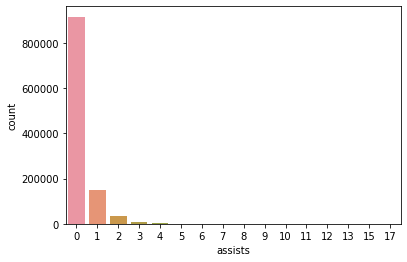

In [13]:
sns.countplot(df['assists'])

Most of the players don't get any assists. Very few players get more than 4 assists.

[Text(0, 0, 'squad-fpp'),
 Text(0, 0, 'squad-fpp'),
 Text(0, 0, 'solo-fpp'),
 Text(0, 0, 'squad-fpp'),
 Text(0, 0, 'solo'),
 Text(0, 0, 'solo-fpp'),
 Text(0, 0, 'solo-fpp'),
 Text(0, 0, 'solo-fpp'),
 Text(0, 0, 'duo'),
 Text(0, 0, 'squad-fpp'),
 Text(0, 0, 'duo-fpp'),
 Text(0, 0, 'squad-fpp'),
 Text(0, 0, 'solo-fpp'),
 Text(0, 0, 'squad-fpp'),
 Text(0, 0, 'squad-fpp'),
 Text(0, 0, 'squad')]

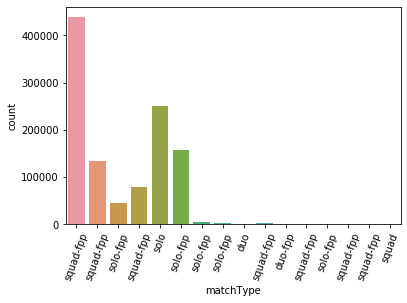

In [14]:
p=sns.countplot(df['matchType'])
p.set_xticklabels(labels=df['matchType'],rotation=70)

Maximum players prefer to play "squad-fpp" and "solo" match.

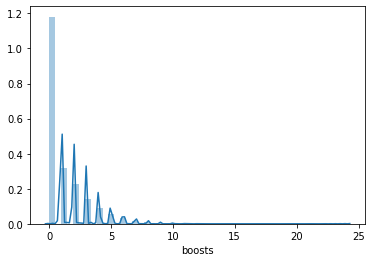

In [15]:
sns.distplot(df['boosts'])

Most of the players have 0 boosts.

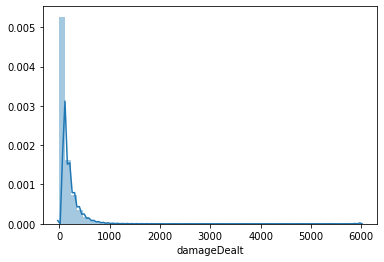

In [16]:
sns.distplot(df['damageDealt'])

damageDealt is left skewed.

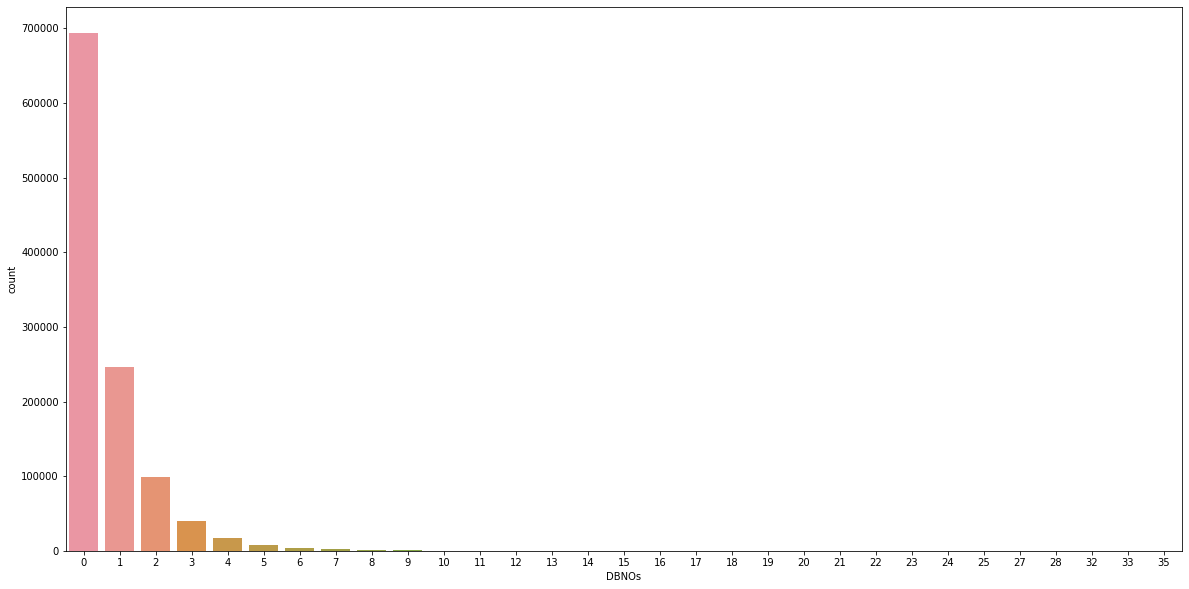

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(df['DBNOs'])

Maximum players have 0 DBNOs and most of the players have DBNOs less than 9

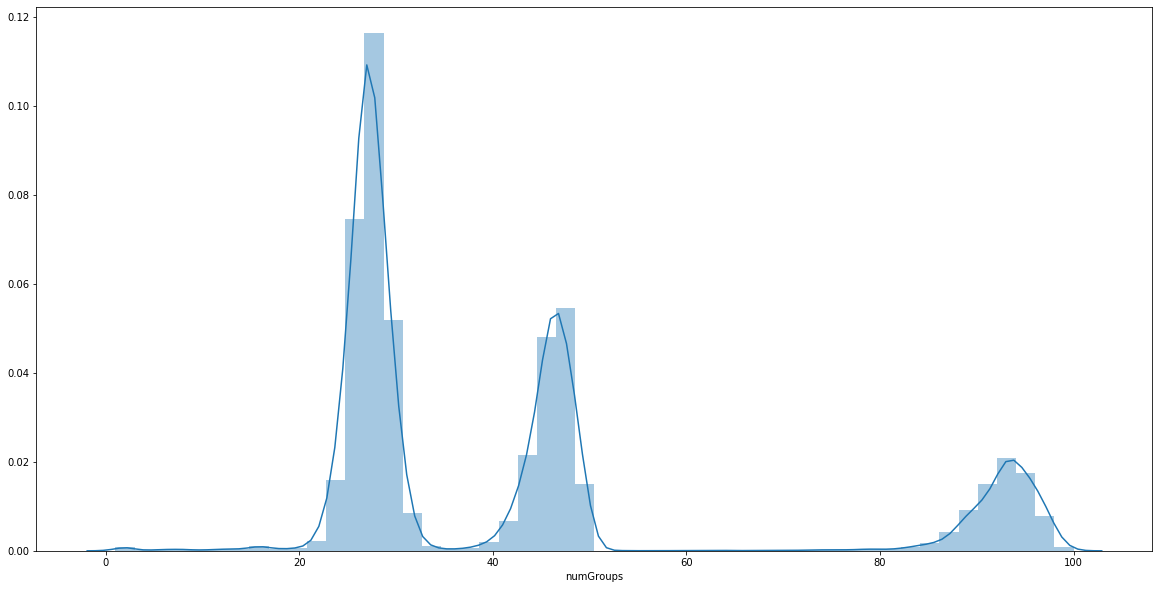

In [18]:
plt.figure(figsize=(20,10))
sns.distplot(df['numGroups'])

Most of players have 20 to 30, 40 to 50 and 80 to 100 groups.

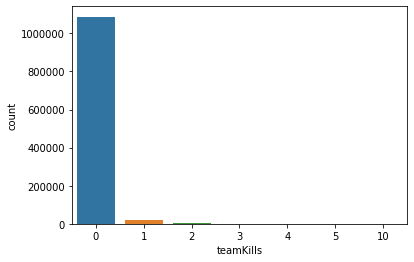

In [19]:
sns.countplot(df['teamKills'])

Most of the players are not able to kill any team. Some are able to kill 1 or 2 teams. Any very are able to kill 10 teams.

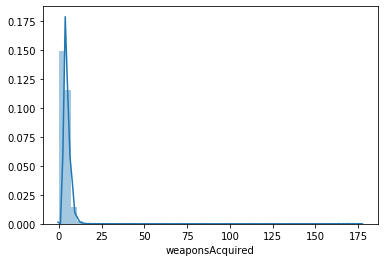

In [20]:
sns.distplot(df['weaponsAcquired'])

Most of the players have aquired 0 to 20 weapons.

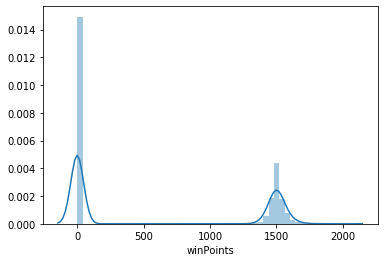

In [21]:
sns.distplot(df['winPoints'])

Maximum players do not get any win points. Some get 1500 points.

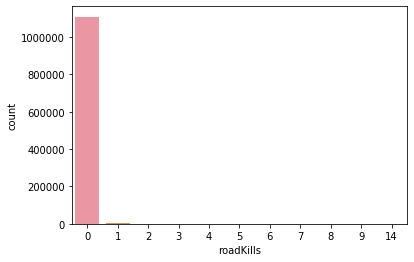

In [22]:
sns.countplot(df['roadKills'])

Most of the players do not have any road kill.

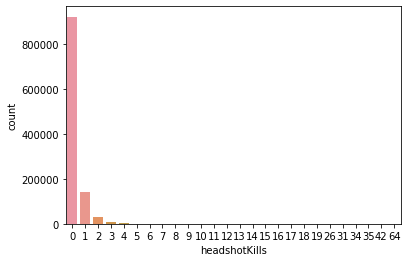

In [23]:
sns.countplot(df['headshotKills'])

Most of the players do not have any headshot kills but headshot kills ranges between 0 to 64.

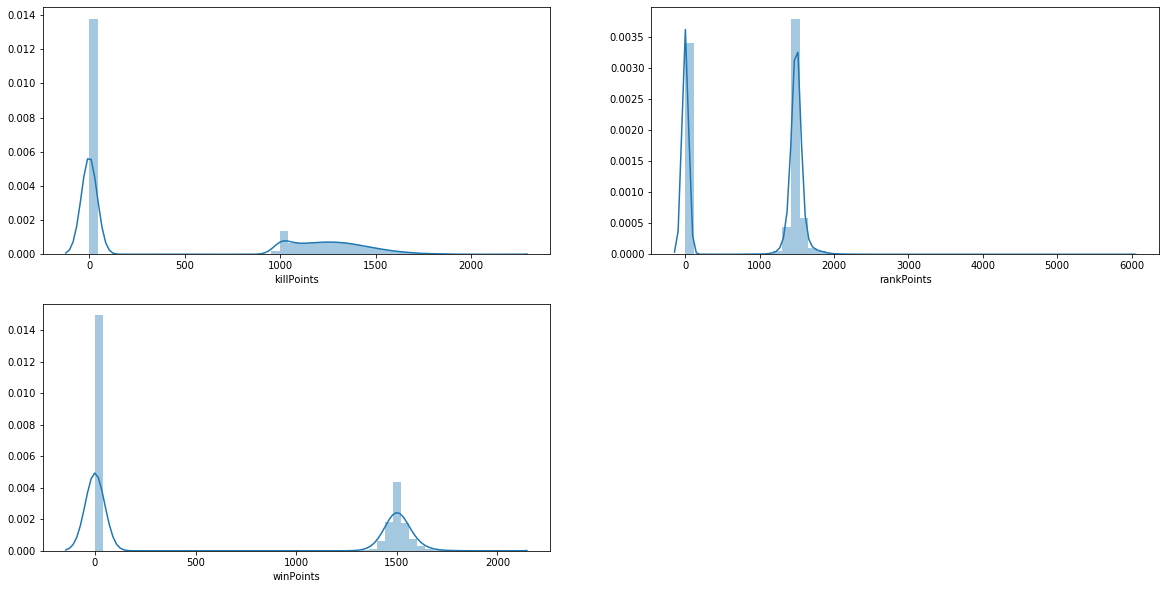

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.distplot(df['killPoints'])
plt.subplot(222)
sns.distplot(df['rankPoints'])
plt.subplot(223)
sns.distplot(df['winPoints'])
plt.show()

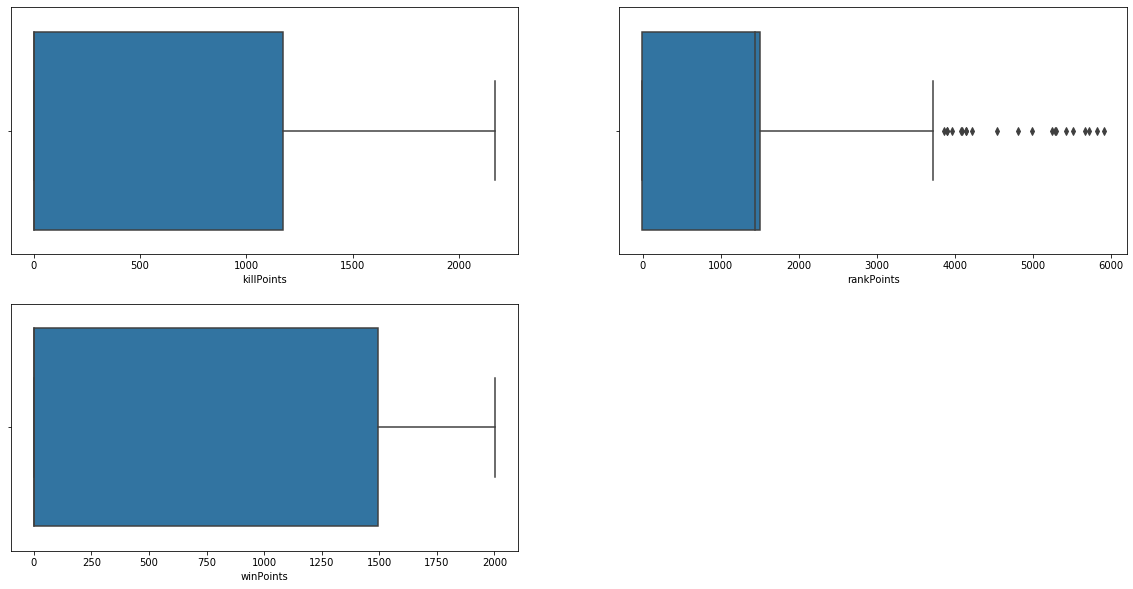

In [25]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.boxplot(df['killPoints'])
plt.subplot(222)
sns.boxplot(df['rankPoints'])
plt.subplot(223)
sns.boxplot(df['winPoints'])
plt.show()

rankPoints > 3800 are outliers.

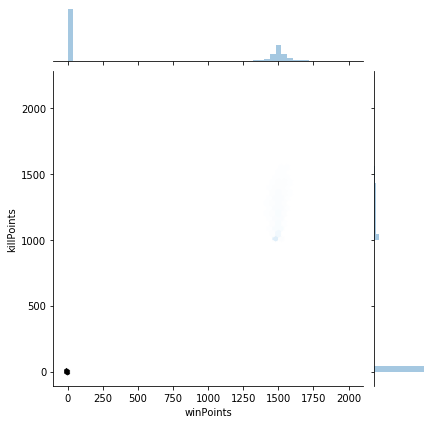

In [27]:
sns.jointplot(x=df['winPoints'],y=df['killPoints'],kind='hex',data=df)

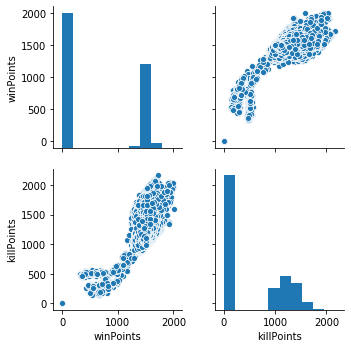

In [28]:
sns.pairplot(df,vars=['winPoints','killPoints'])

KillPoints and winPoints are highly related.

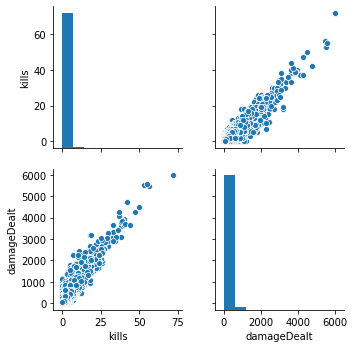

In [29]:
sns.pairplot(df, vars=['kills','damageDealt'])

There is a linear relation between kills and damageDealt.

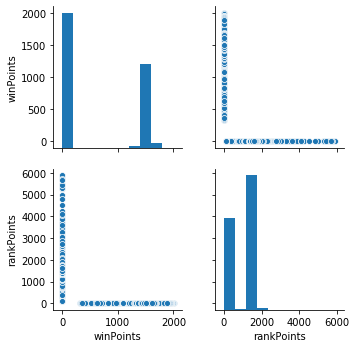

In [31]:
sns.pairplot(df, vars=['winPoints','rankPoints'])

winPoints and rankPoints are highly negatively related.

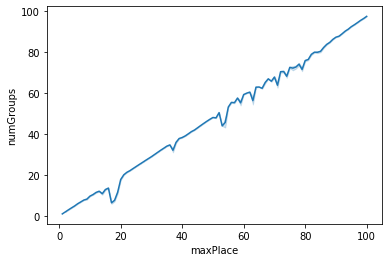

In [32]:
sns.lineplot(df['maxPlace'],df['numGroups'])

maxPlace and numGroups are also highly linearly related.

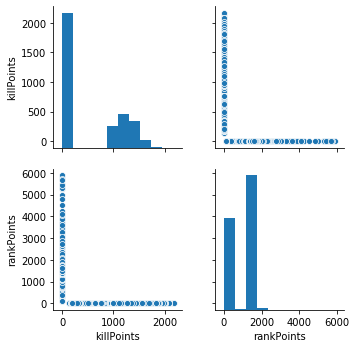

In [33]:
sns.pairplot(df, vars=['killPoints','rankPoints'])

There is a negative relation between killPoints and rankPoints.

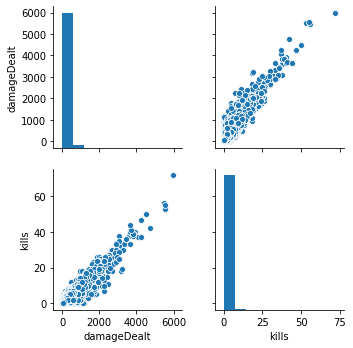

In [34]:
sns.pairplot(df,vars=['damageDealt','kills'])

damageDealt and kills are linearly related.

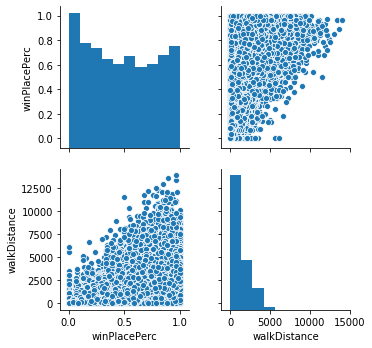

In [38]:
sns.pairplot(df,vars=['winPlacePerc','walkDistance'])

winPlacePerc and walkDistance are also related.

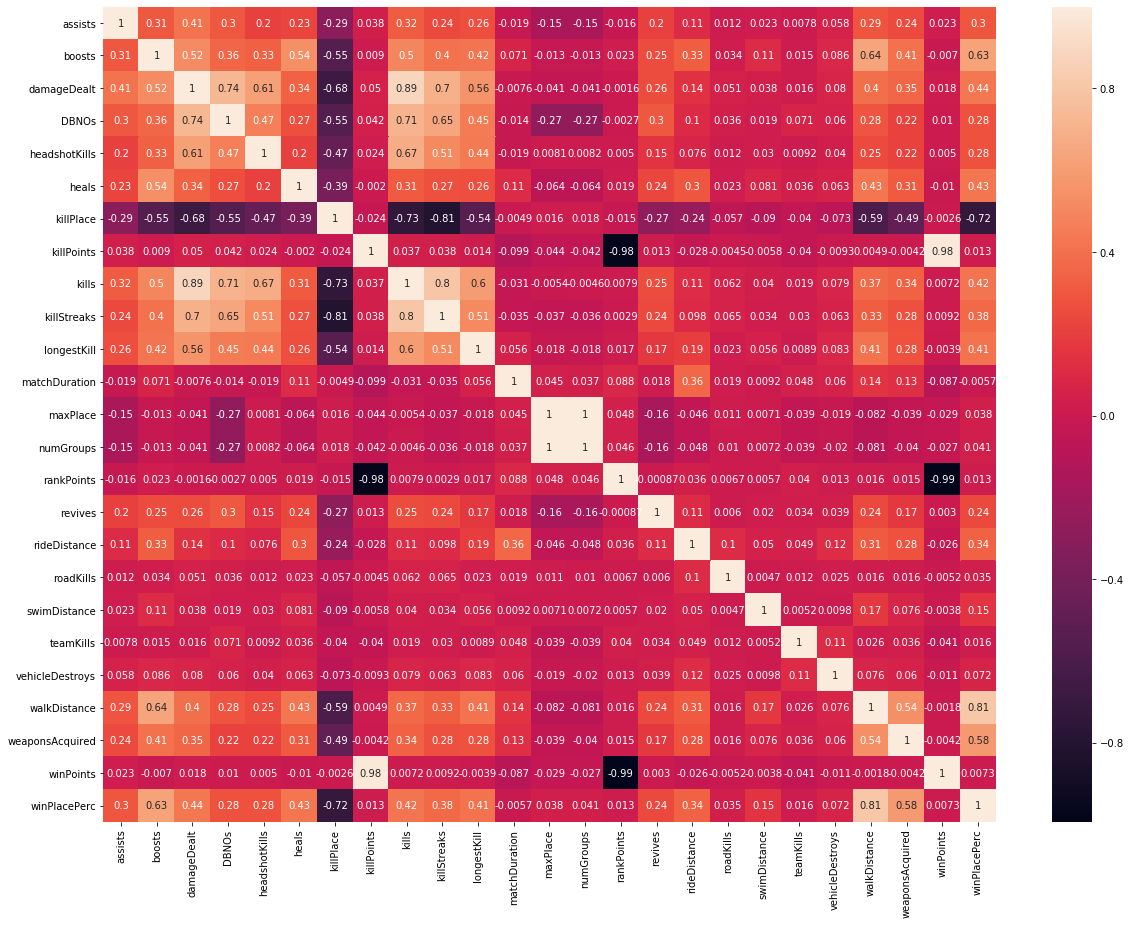

In [40]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

The above heatmap for correlation shows that:
* maxPlace and numGroups are completely dependent so we can drop one of them.
* winPoints and rankPoints are highly negatively related, killPoints and ranksPoints are also highly negatively related ,winPoints and killPoints are highly positively related so we can drop winPoints and rankPoints.
* winPlacePerc highly depends on killPlace and walkDistance so we do not drop any of them.

## Conclusion
* There are so many outliers in columns which needs to be handled.
* Unnamed: 0 and Id have all categorical unique values so these columns can be dropped.
* Many columns are correlated so some them needs to be dropped.